In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#spilit and load data

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine all the data
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# Preprocess the data
x_all = x_all / 255.0

# Normalize the image data to the range [0, 1]
x_all = (x_all - np.min(x_all)) / (np.max(x_all) - np.min(x_all))

# Encode the labels in one-hot form
num_classes = 10
y_all_encoded = keras.utils.to_categorical(y_all, num_classes)

# Split the data into training, testing, and validation sets
num_samples = x_all.shape[0]
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1

# Randomly split the data into training, testing, and validation sets
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all_encoded, test_size=test_ratio+val_ratio, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=val_ratio/(test_ratio+val_ratio), random_state=42)

# Display an example image from each class
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 [==============================] - 2s 0us/step


#plot image of each class and some size info

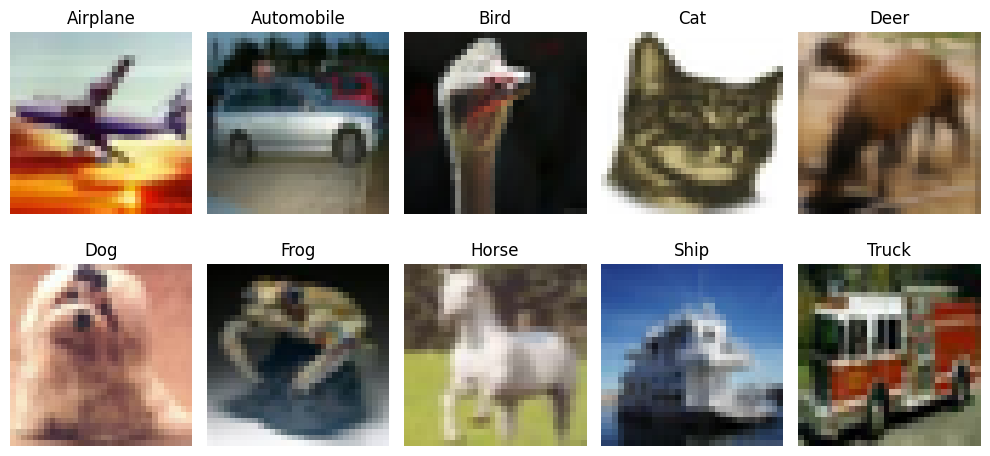

Number of classes: 10
Image dimensions: (32, 32, 3)
Value range of each image: [0, 1]


In [ ]:
plt.figure(figsize=(10, 5))
for i in range(num_classes):
    class_idx = np.where(y_train[:, i] == 1)[0][0]
    img = x_train[class_idx]
    plt.subplot(2, 5, i+1)
    plt.imshow(img, interpolation='nearest')
    plt.title(class_names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print information about the data
print("Number of classes:", num_classes)
print("Image dimensions:", x_all.shape[1:])
print("Value range of each image: [0, 1]")

#2 block simple model

Epoch 1/10
750/750 [==============================] - 221s 291ms/step - loss: 1.6397 - accuracy: 0.3990 - val_loss: 1.3581 - val_accuracy: 0.5038
Epoch 2/10
750/750 [==============================] - 211s 281ms/step - loss: 1.2506 - accuracy: 0.5512 - val_loss: 1.1634 - val_accuracy: 0.5855
Epoch 3/10
750/750 [==============================] - 205s 273ms/step - loss: 1.0553 - accuracy: 0.6281 - val_loss: 1.0167 - val_accuracy: 0.6400
Epoch 4/10
750/750 [==============================] - 230s 306ms/step - loss: 0.9288 - accuracy: 0.6711 - val_loss: 0.9645 - val_accuracy: 0.6652
Epoch 5/10
750/750 [==============================] - 204s 272ms/step - loss: 0.8253 - accuracy: 0.7111 - val_loss: 0.9530 - val_accuracy: 0.6665
Epoch 6/10
750/750 [==============================] - 207s 277ms/step - loss: 0.7469 - accuracy: 0.7387 - val_loss: 0.8565 - val_accuracy: 0.7020
Epoch 7/10
750/750 [==============================] - 211s 282ms/step - loss: 0.6795 - accuracy: 0.7615 - val_loss: 0.8835 -

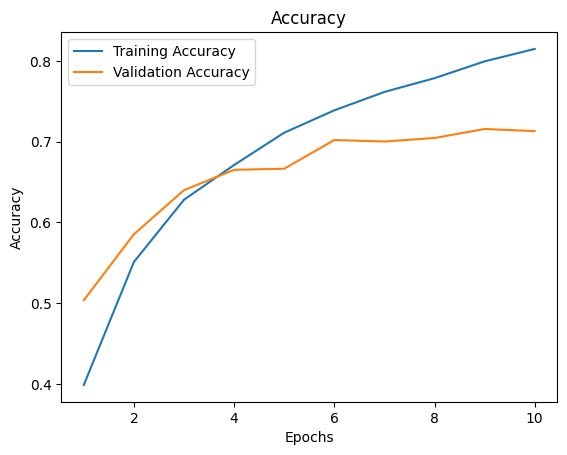

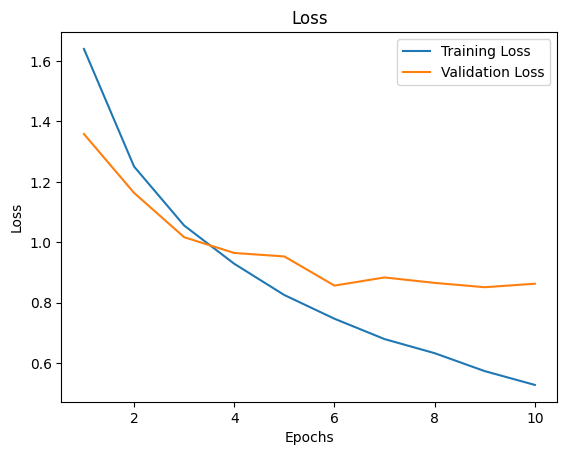

In [ ]:
# Create the model 2 blocks
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#1 block simple model

Epoch 1/10
750/750 [==============================] - 186s 244ms/step - loss: 1.4021 - accuracy: 0.4961 - val_loss: 1.1270 - val_accuracy: 0.5952
Epoch 2/10
750/750 [==============================] - 171s 229ms/step - loss: 1.0045 - accuracy: 0.6470 - val_loss: 0.9890 - val_accuracy: 0.6485
Epoch 3/10
750/750 [==============================] - 165s 220ms/step - loss: 0.8380 - accuracy: 0.7073 - val_loss: 0.9672 - val_accuracy: 0.6708
Epoch 4/10
750/750 [==============================] - 169s 225ms/step - loss: 0.7015 - accuracy: 0.7560 - val_loss: 0.9239 - val_accuracy: 0.6850
Epoch 5/10
750/750 [==============================] - 168s 225ms/step - loss: 0.5782 - accuracy: 0.7958 - val_loss: 0.9917 - val_accuracy: 0.6762
Epoch 6/10
750/750 [==============================] - 164s 219ms/step - loss: 0.4496 - accuracy: 0.8416 - val_loss: 1.1145 - val_accuracy: 0.6670
Epoch 7/10
750/750 [==============================] - 166s 221ms/step - loss: 0.3339 - accuracy: 0.8832 - val_loss: 1.2094 -

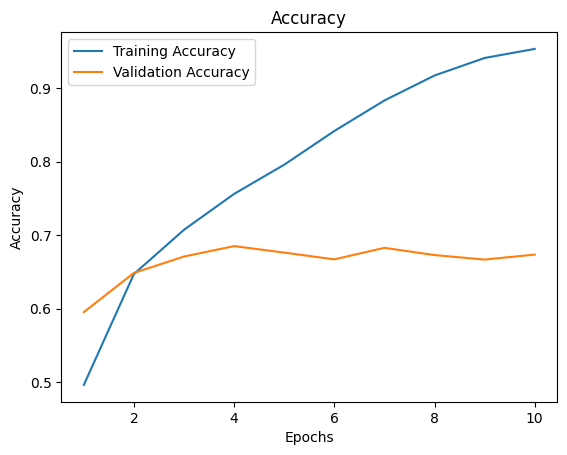

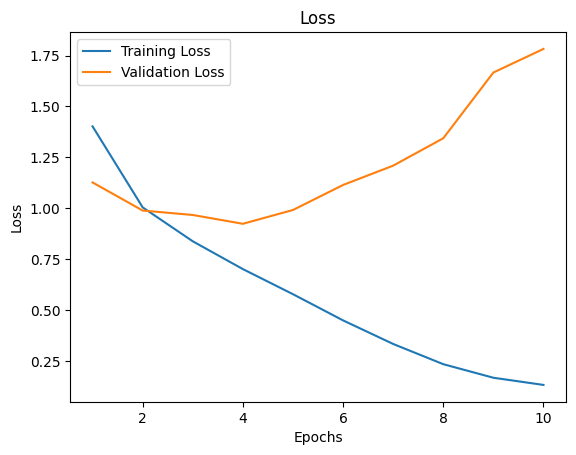

In [ ]:
# Create the model 1 block
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#3 block simple model

Epoch 1/10
750/750 [==============================] - 243s 322ms/step - loss: 1.6807 - accuracy: 0.3750 - val_loss: 1.4052 - val_accuracy: 0.4797
Epoch 2/10
750/750 [==============================] - 239s 319ms/step - loss: 1.2685 - accuracy: 0.5428 - val_loss: 1.2013 - val_accuracy: 0.5667
Epoch 3/10
750/750 [==============================] - 233s 310ms/step - loss: 1.0561 - accuracy: 0.6219 - val_loss: 1.0994 - val_accuracy: 0.6198
Epoch 4/10
750/750 [==============================] - 231s 308ms/step - loss: 0.9118 - accuracy: 0.6797 - val_loss: 1.0508 - val_accuracy: 0.6305
Epoch 5/10
750/750 [==============================] - 244s 326ms/step - loss: 0.8056 - accuracy: 0.7160 - val_loss: 0.8982 - val_accuracy: 0.6837
Epoch 6/10
750/750 [==============================] - 238s 317ms/step - loss: 0.7125 - accuracy: 0.7493 - val_loss: 0.8808 - val_accuracy: 0.6950
Epoch 7/10
750/750 [==============================] - 237s 315ms/step - loss: 0.6315 - accuracy: 0.7753 - val_loss: 0.9279 -

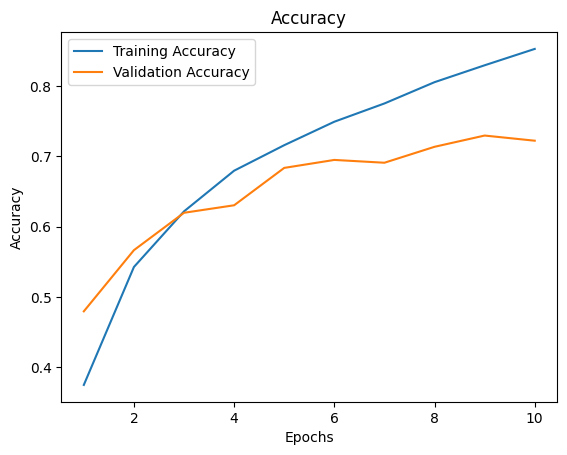

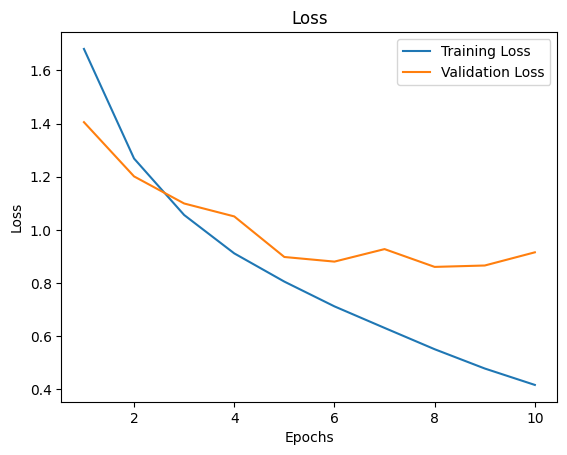

In [ ]:
# Create the model 3 blocks
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# use padding for the dimention to not be negative!!
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#3 block model with batchnormalization(BN after every conv filter)

Epoch 1/10
750/750 [==============================] - 292s 384ms/step - loss: 1.3960 - accuracy: 0.5046 - val_loss: 1.2342 - val_accuracy: 0.5650
Epoch 2/10
750/750 [==============================] - 291s 388ms/step - loss: 0.9556 - accuracy: 0.6631 - val_loss: 0.9407 - val_accuracy: 0.6665
Epoch 3/10
750/750 [==============================] - 289s 385ms/step - loss: 0.7724 - accuracy: 0.7289 - val_loss: 0.8843 - val_accuracy: 0.6922
Epoch 4/10
750/750 [==============================] - 289s 386ms/step - loss: 0.6608 - accuracy: 0.7692 - val_loss: 0.8314 - val_accuracy: 0.7150
Epoch 5/10
750/750 [==============================] - 292s 389ms/step - loss: 0.5644 - accuracy: 0.8012 - val_loss: 0.8062 - val_accuracy: 0.7368
Epoch 6/10
750/750 [==============================] - 292s 389ms/step - loss: 0.4862 - accuracy: 0.8290 - val_loss: 0.8023 - val_accuracy: 0.7337
Epoch 7/10
750/750 [==============================] - 289s 385ms/step - loss: 0.4078 - accuracy: 0.8552 - val_loss: 0.8741 -

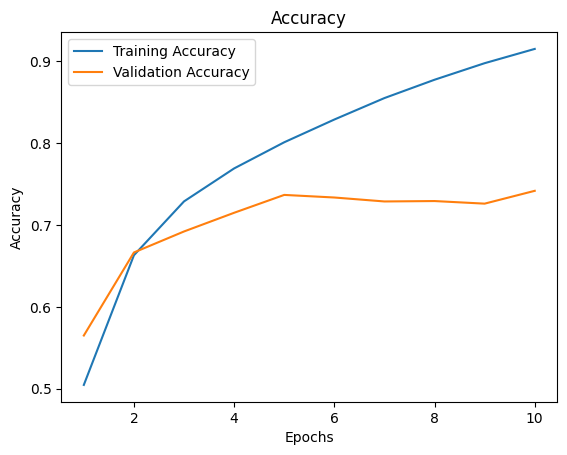

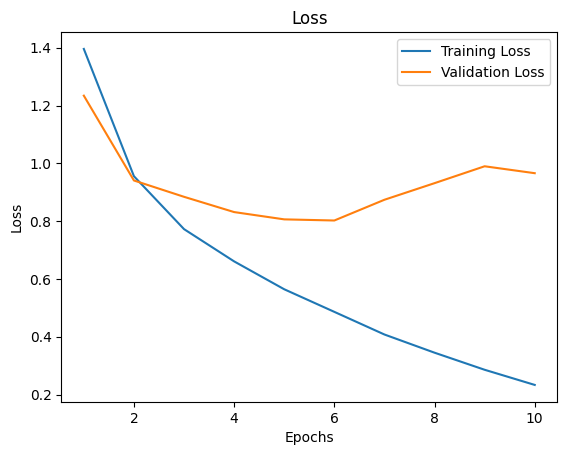

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Create the model with batch normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#2 block model with batchnormalization(BN after every conv filter)

Epoch 1/10
750/750 [==============================] - 265s 350ms/step - loss: 1.3555 - accuracy: 0.5173 - val_loss: 1.1537 - val_accuracy: 0.5920
Epoch 2/10
750/750 [==============================] - 265s 353ms/step - loss: 0.9296 - accuracy: 0.6699 - val_loss: 1.0767 - val_accuracy: 0.6352
Epoch 3/10
750/750 [==============================] - 264s 352ms/step - loss: 0.7646 - accuracy: 0.7320 - val_loss: 0.9516 - val_accuracy: 0.6722
Epoch 4/10
750/750 [==============================] - 259s 346ms/step - loss: 0.6468 - accuracy: 0.7725 - val_loss: 0.9225 - val_accuracy: 0.6955
Epoch 5/10
750/750 [==============================] - 257s 343ms/step - loss: 0.5580 - accuracy: 0.8019 - val_loss: 0.8223 - val_accuracy: 0.7283
Epoch 6/10
750/750 [==============================] - 257s 343ms/step - loss: 0.4782 - accuracy: 0.8321 - val_loss: 0.8145 - val_accuracy: 0.7437
Epoch 7/10
750/750 [==============================] - 257s 342ms/step - loss: 0.4038 - accuracy: 0.8577 - val_loss: 0.9281 -

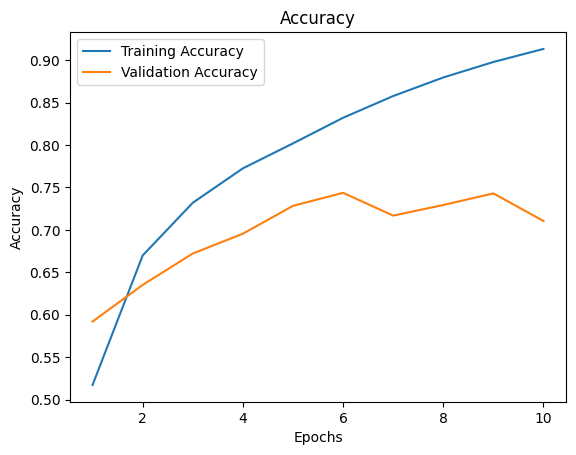

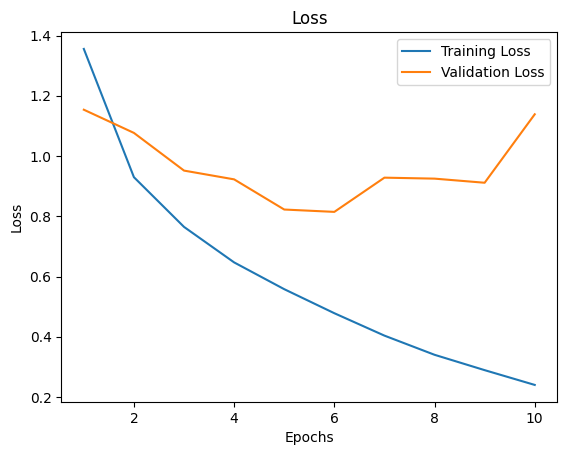

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Create the model with batch normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#1 block model with batchnormalization(BN after every conv filter)

Epoch 1/10
750/750 [==============================] - 217s 285ms/step - loss: 1.3213 - accuracy: 0.5354 - val_loss: 1.3260 - val_accuracy: 0.5487
Epoch 2/10
750/750 [==============================] - 219s 292ms/step - loss: 0.9170 - accuracy: 0.6788 - val_loss: 1.0970 - val_accuracy: 0.6263
Epoch 3/10
750/750 [==============================] - 217s 290ms/step - loss: 0.7485 - accuracy: 0.7379 - val_loss: 1.0290 - val_accuracy: 0.6565
Epoch 4/10
750/750 [==============================] - 212s 282ms/step - loss: 0.6057 - accuracy: 0.7895 - val_loss: 1.0552 - val_accuracy: 0.6667
Epoch 5/10
750/750 [==============================] - 209s 279ms/step - loss: 0.4715 - accuracy: 0.8340 - val_loss: 1.0991 - val_accuracy: 0.6712
Epoch 6/10
750/750 [==============================] - 212s 283ms/step - loss: 0.3559 - accuracy: 0.8762 - val_loss: 1.4515 - val_accuracy: 0.6338
Epoch 7/10
750/750 [==============================] - 210s 280ms/step - loss: 0.2618 - accuracy: 0.9094 - val_loss: 1.4118 -

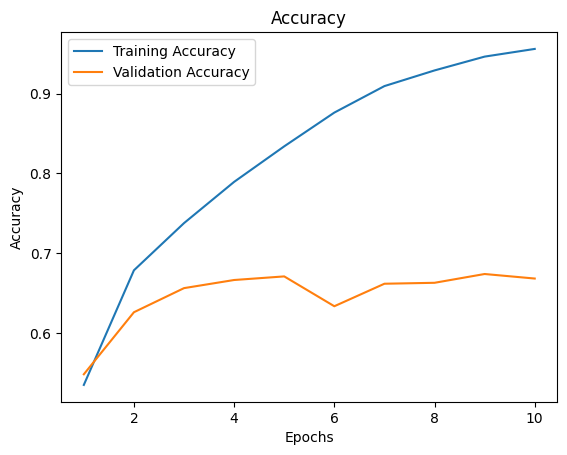

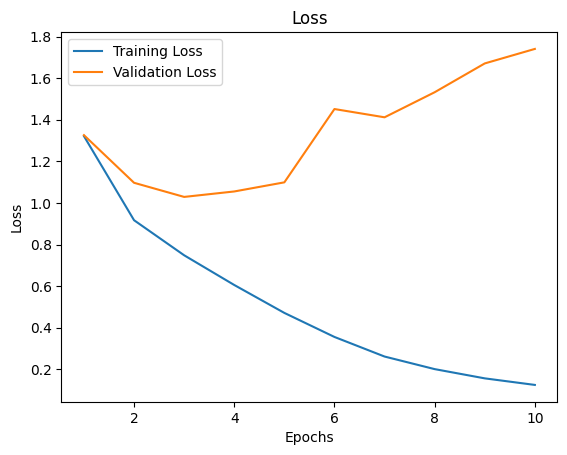

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Create the model with batch normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#3 block model with dropout(dropout before pooling filter and one for fully conected layers)

Epoch 1/10
750/750 [==============================] - 277s 366ms/step - loss: 1.8835 - accuracy: 0.2859 - val_loss: 1.5301 - val_accuracy: 0.4387
Epoch 2/10
750/750 [==============================] - 261s 347ms/step - loss: 1.4546 - accuracy: 0.4757 - val_loss: 1.2769 - val_accuracy: 0.5345
Epoch 3/10
750/750 [==============================] - 256s 342ms/step - loss: 1.3004 - accuracy: 0.5388 - val_loss: 1.1951 - val_accuracy: 0.5577
Epoch 4/10
750/750 [==============================] - 240s 320ms/step - loss: 1.2041 - accuracy: 0.5733 - val_loss: 1.1289 - val_accuracy: 0.5988
Epoch 5/10
750/750 [==============================] - 255s 339ms/step - loss: 1.1267 - accuracy: 0.6071 - val_loss: 1.0488 - val_accuracy: 0.6330
Epoch 6/10
750/750 [==============================] - 254s 339ms/step - loss: 1.0619 - accuracy: 0.6302 - val_loss: 0.9876 - val_accuracy: 0.6500
Epoch 7/10
750/750 [==============================] - 265s 353ms/step - loss: 1.0033 - accuracy: 0.6532 - val_loss: 0.9495 -

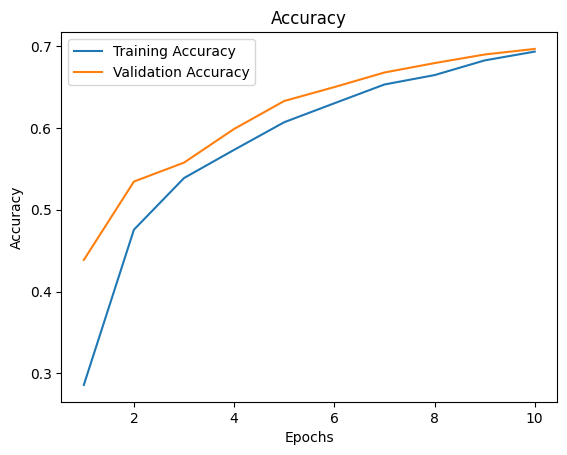

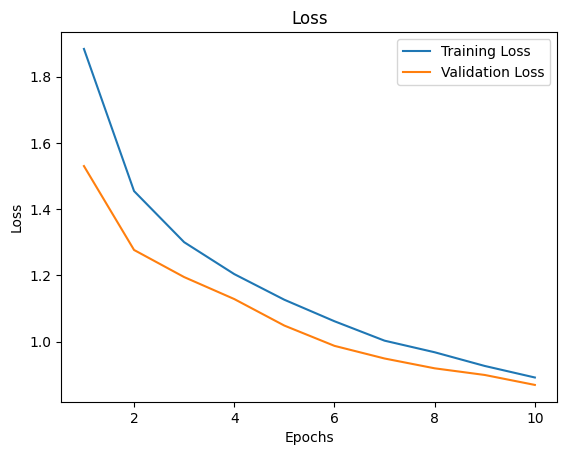

In [ ]:
from tensorflow.keras.layers import Dropout

# Create the model with dropout regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#2 block model with dropout(dropout before pooling filter and one for fully conected layers)

Epoch 1/10
750/750 [==============================] - 222s 294ms/step - loss: 1.7847 - accuracy: 0.3345 - val_loss: 1.4755 - val_accuracy: 0.4585
Epoch 2/10
750/750 [==============================] - 224s 299ms/step - loss: 1.4263 - accuracy: 0.4830 - val_loss: 1.2907 - val_accuracy: 0.5347
Epoch 3/10
750/750 [==============================] - 223s 297ms/step - loss: 1.2661 - accuracy: 0.5486 - val_loss: 1.1142 - val_accuracy: 0.5983
Epoch 4/10
750/750 [==============================] - 225s 299ms/step - loss: 1.1591 - accuracy: 0.5897 - val_loss: 1.0863 - val_accuracy: 0.6177
Epoch 5/10
750/750 [==============================] - 209s 279ms/step - loss: 1.0799 - accuracy: 0.6199 - val_loss: 0.9333 - val_accuracy: 0.6695
Epoch 6/10
750/750 [==============================] - 223s 297ms/step - loss: 1.0237 - accuracy: 0.6393 - val_loss: 0.9176 - val_accuracy: 0.6802
Epoch 7/10
750/750 [==============================] - 220s 294ms/step - loss: 0.9618 - accuracy: 0.6644 - val_loss: 0.8916 -

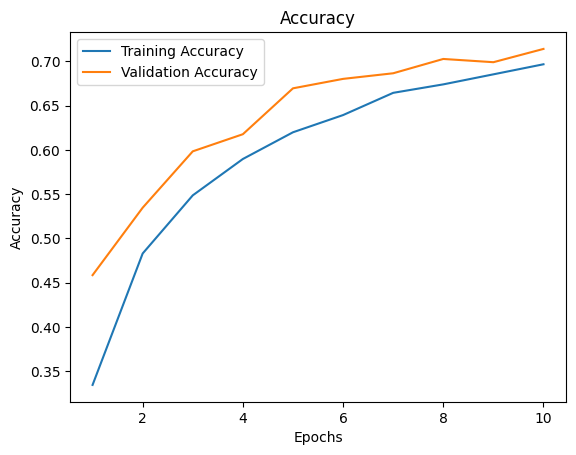

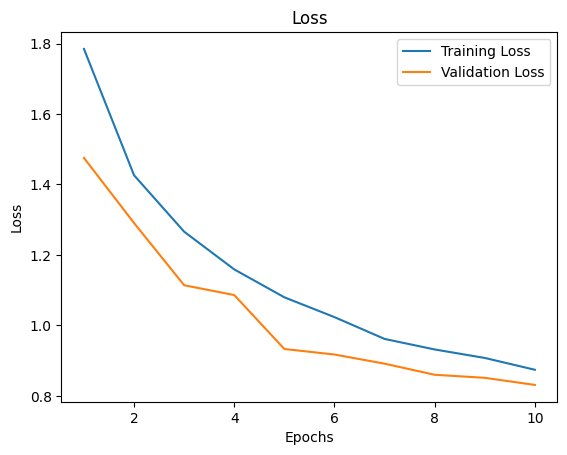

In [ ]:
from tensorflow.keras.layers import Dropout

# Create the model with dropout regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#1 block model with dropout(dropout before pooling filter and one for fully conected layers)

Epoch 1/10
750/750 [==============================] - 217s 283ms/step - loss: 1.6746 - accuracy: 0.3859 - val_loss: 1.3516 - val_accuracy: 0.5242
Epoch 2/10
750/750 [==============================] - 178s 238ms/step - loss: 1.3708 - accuracy: 0.5095 - val_loss: 1.1925 - val_accuracy: 0.5777
Epoch 3/10
750/750 [==============================] - 175s 233ms/step - loss: 1.2285 - accuracy: 0.5615 - val_loss: 1.0940 - val_accuracy: 0.6150
Epoch 4/10
750/750 [==============================] - 188s 251ms/step - loss: 1.1344 - accuracy: 0.5965 - val_loss: 1.0367 - val_accuracy: 0.6367
Epoch 5/10
750/750 [==============================] - 175s 233ms/step - loss: 1.0676 - accuracy: 0.6230 - val_loss: 0.9762 - val_accuracy: 0.6595
Epoch 6/10
750/750 [==============================] - 175s 233ms/step - loss: 1.0094 - accuracy: 0.6432 - val_loss: 0.9678 - val_accuracy: 0.6630
Epoch 7/10
750/750 [==============================] - 185s 247ms/step - loss: 0.9624 - accuracy: 0.6597 - val_loss: 0.9291 -

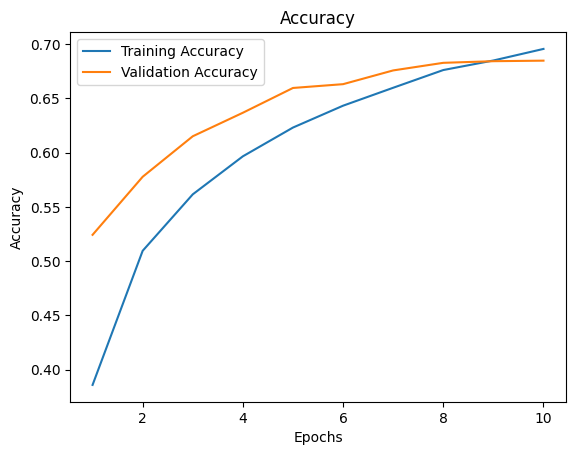

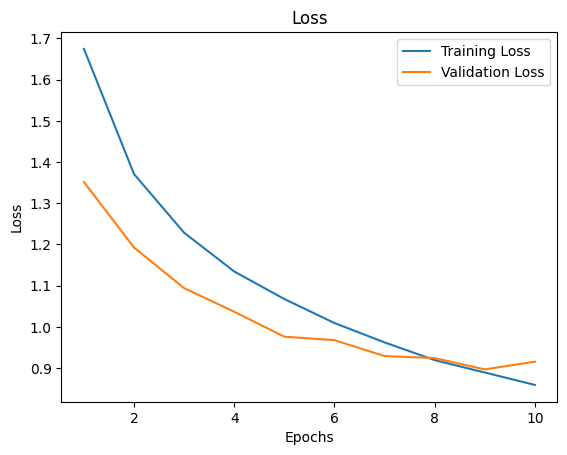

In [ ]:
from tensorflow.keras.layers import Dropout

# Create the model with dropout regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#3 block model with batchnormalization(BN after the feture extraction block)

Epoch 1/10
750/750 [==============================] - 253s 334ms/step - loss: 1.4494 - accuracy: 0.4826 - val_loss: 1.3358 - val_accuracy: 0.5287
Epoch 2/10
750/750 [==============================] - 241s 321ms/step - loss: 1.0461 - accuracy: 0.6302 - val_loss: 1.3711 - val_accuracy: 0.5562
Epoch 3/10
750/750 [==============================] - 241s 321ms/step - loss: 0.8585 - accuracy: 0.6986 - val_loss: 1.0855 - val_accuracy: 0.6292
Epoch 4/10
750/750 [==============================] - 243s 324ms/step - loss: 0.7336 - accuracy: 0.7418 - val_loss: 1.0045 - val_accuracy: 0.6627
Epoch 5/10
750/750 [==============================] - 246s 328ms/step - loss: 0.6363 - accuracy: 0.7756 - val_loss: 1.0524 - val_accuracy: 0.6590
Epoch 6/10
750/750 [==============================] - 241s 322ms/step - loss: 0.5437 - accuracy: 0.8090 - val_loss: 0.9308 - val_accuracy: 0.7008
Epoch 7/10
750/750 [==============================] - 241s 322ms/step - loss: 0.4662 - accuracy: 0.8360 - val_loss: 0.9461 -

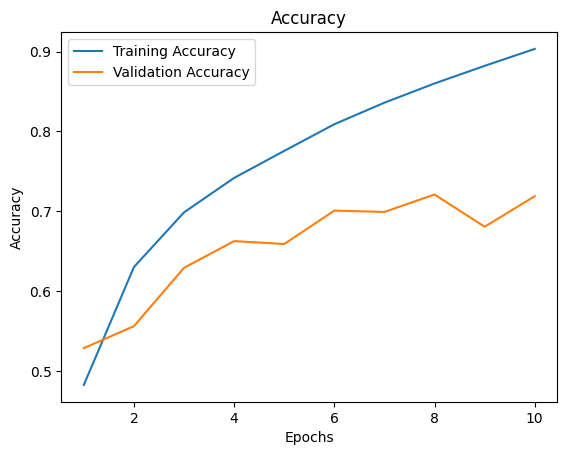

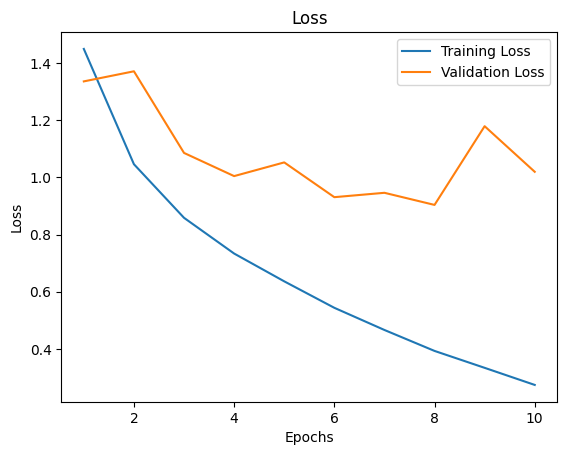

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Create the model with batch normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#2 block model with batchnormalization(BN after the feture extraction block)

Epoch 1/10
750/750 [==============================] - 223s 293ms/step - loss: 1.4352 - accuracy: 0.4856 - val_loss: 1.5206 - val_accuracy: 0.4883
Epoch 2/10
750/750 [==============================] - 217s 290ms/step - loss: 0.9981 - accuracy: 0.6483 - val_loss: 1.1396 - val_accuracy: 0.5972
Epoch 3/10
750/750 [==============================] - 217s 289ms/step - loss: 0.8104 - accuracy: 0.7154 - val_loss: 0.9866 - val_accuracy: 0.6580
Epoch 4/10
750/750 [==============================] - 217s 290ms/step - loss: 0.6962 - accuracy: 0.7555 - val_loss: 0.9432 - val_accuracy: 0.6810
Epoch 5/10
750/750 [==============================] - 212s 283ms/step - loss: 0.6085 - accuracy: 0.7851 - val_loss: 1.1411 - val_accuracy: 0.6422
Epoch 6/10
750/750 [==============================] - 215s 287ms/step - loss: 0.5297 - accuracy: 0.8139 - val_loss: 0.9173 - val_accuracy: 0.7067
Epoch 7/10
750/750 [==============================] - 213s 284ms/step - loss: 0.4549 - accuracy: 0.8405 - val_loss: 0.9843 -

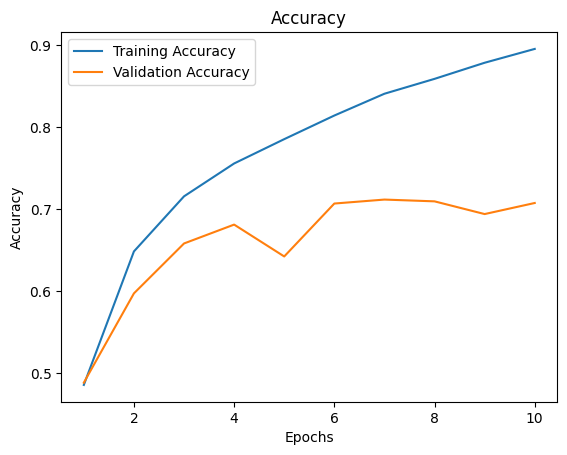

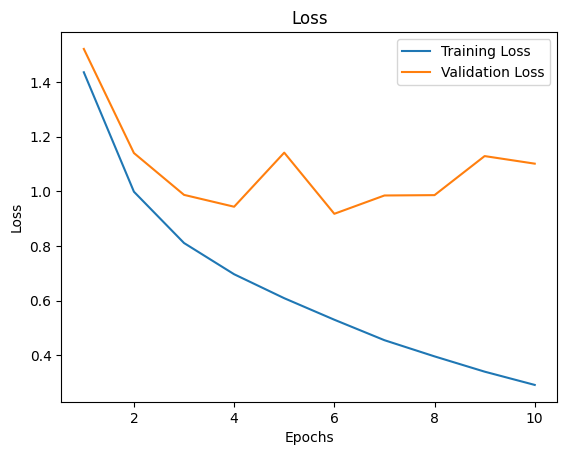

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Create the model with batch normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#1 block model with batchnormalization(BN after the feture extraction block)

Epoch 1/10
750/750 [==============================] - 180s 239ms/step - loss: 1.2834 - accuracy: 0.5428 - val_loss: 1.1034 - val_accuracy: 0.6123
Epoch 2/10
750/750 [==============================] - 168s 224ms/step - loss: 0.8911 - accuracy: 0.6876 - val_loss: 1.0654 - val_accuracy: 0.6395
Epoch 3/10
750/750 [==============================] - 165s 220ms/step - loss: 0.6777 - accuracy: 0.7617 - val_loss: 1.0020 - val_accuracy: 0.6705
Epoch 4/10
750/750 [==============================] - 168s 224ms/step - loss: 0.4795 - accuracy: 0.8324 - val_loss: 1.1033 - val_accuracy: 0.6717
Epoch 5/10
750/750 [==============================] - 165s 220ms/step - loss: 0.3244 - accuracy: 0.8855 - val_loss: 1.4795 - val_accuracy: 0.6528
Epoch 6/10
750/750 [==============================] - 166s 221ms/step - loss: 0.2102 - accuracy: 0.9280 - val_loss: 1.4937 - val_accuracy: 0.6598
Epoch 7/10
750/750 [==============================] - 171s 228ms/step - loss: 0.1455 - accuracy: 0.9504 - val_loss: 1.7098 -

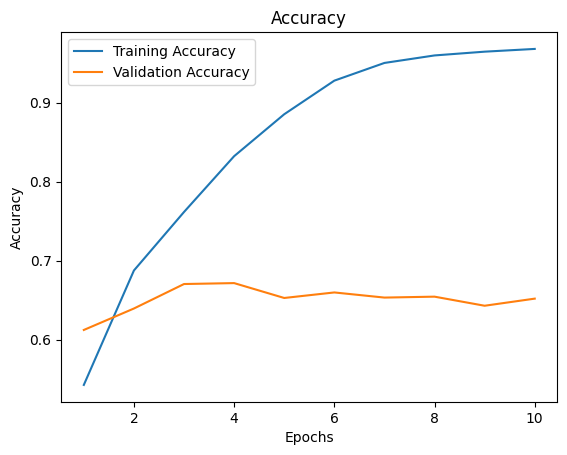

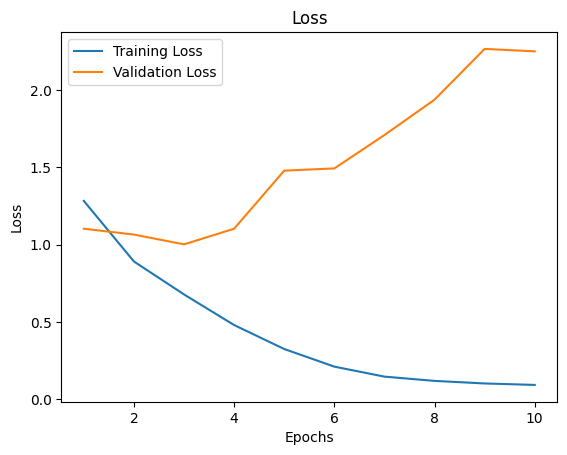

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Create the model with batch normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#torch example
#on 1 block feture extraction (witout BN or DropOut)

Files already downloaded and verified
Files already downloaded and verified


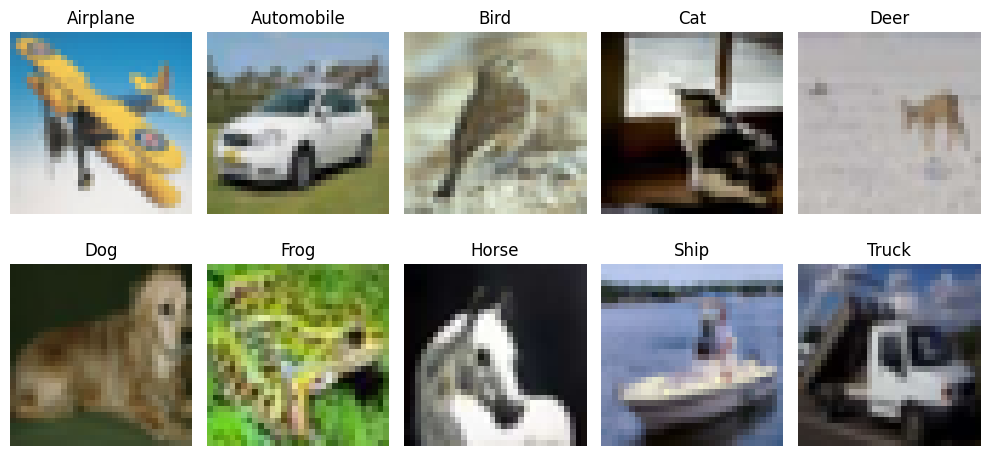

Number of classes: 10
Image dimensions: torch.Size([3, 32, 32])
Value range of each image: [-1, 1]
Epoch [1/10], Train Loss: 1.3863, Train Acc: 0.5014, Val Loss: 1.0956, Val Acc: 0.6129
Epoch [2/10], Train Loss: 0.9636, Train Acc: 0.6602, Val Loss: 0.9347, Val Acc: 0.6683
Epoch [3/10], Train Loss: 0.7670, Train Acc: 0.7313, Val Loss: 0.9386, Val Acc: 0.6751
Epoch [4/10], Train Loss: 0.6060, Train Acc: 0.7876, Val Loss: 0.9665, Val Acc: 0.6801
Epoch [5/10], Train Loss: 0.4556, Train Acc: 0.8408, Val Loss: 1.0037, Val Acc: 0.6896
Epoch [6/10], Train Loss: 0.3105, Train Acc: 0.8918, Val Loss: 1.2031, Val Acc: 0.6810
Epoch [7/10], Train Loss: 0.2078, Train Acc: 0.9271, Val Loss: 1.4504, Val Acc: 0.6712
Epoch [8/10], Train Loss: 0.1352, Train Acc: 0.9538, Val Loss: 1.6943, Val Acc: 0.6634
Epoch [9/10], Train Loss: 0.1170, Train Acc: 0.9594, Val Loss: 1.9590, Val Acc: 0.6612
Epoch [10/10], Train Loss: 0.0902, Train Acc: 0.9681, Val Loss: 2.0748, Val Acc: 0.6660


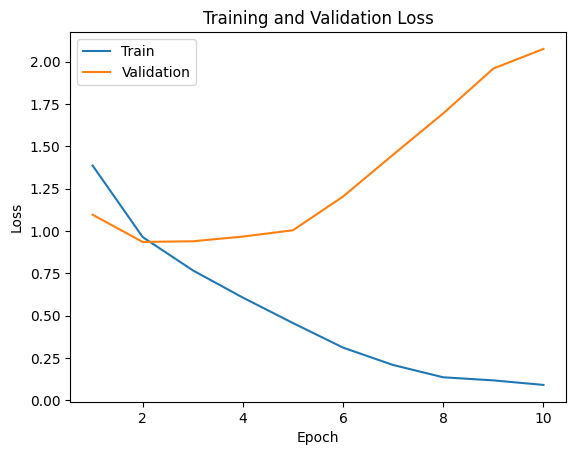

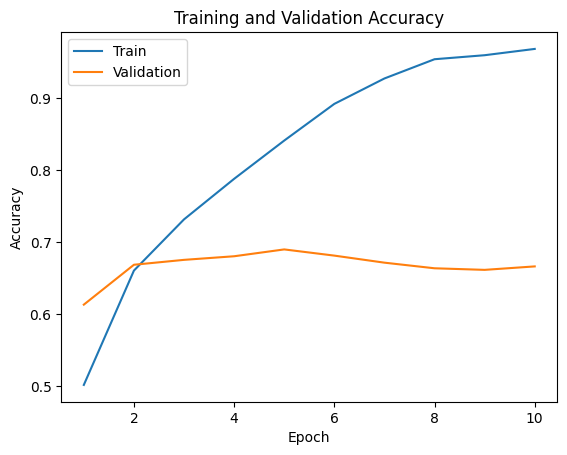

Confusion Matrix:
[[708  28  71  25  37   7  16  13  60  35]
 [ 23 809   8  13   6   7  13   8  28  85]
 [ 72   6 572  63  90  64  70  39  17   7]
 [ 23  19 109 447  73 140 112  54  13  10]
 [ 33   5 104  59 598  29  87  72   9   4]
 [ 17  11  84 184  64 504  47  71  11   7]
 [ 11   6  60  48  51  22 786   9   5   2]
 [ 16   3  45  35  83  48  15 742   3  10]
 [ 95  56  21  25  11   3   5   3 745  36]
 [ 34 106  19  15  11   8  10  21  27 749]]


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the transform to preprocess the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Display an example image from each class
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
dataiter = iter(trainloader)
images, labels = next(dataiter)
plt.figure(figsize=(10, 5))

for i in range(len(class_names)):
    class_idx = (labels == i).nonzero(as_tuple=True)[0][0]
    img = images[class_idx] / 2 + 0.5  # Unnormalize the image
    img = img.numpy().transpose((1, 2, 0))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(class_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print information about the data
num_classes = len(class_names)
image_shape = images[0].shape
print("Number of classes:", num_classes)
print("Image dimensions:", image_shape)
print("Value range of each image: [-1, 1]")

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 16 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize variables for storing predictions and ground truth labels
all_predictions = []
all_labels = []

# Train the model
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_predictions.extend(predicted.tolist())
            all_labels.extend(labels.tolist())

    val_loss /= len(testloader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Plot error (loss) based on epoch
plt.plot(range(1, num_epochs+1), train_losses, label='Train')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot accuracy based on epoch
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)